================================================================================

# TASK 1: Data Cleaning & Preprocessing - Titanic Dataset

================================================================================

## Step 1: Importing Required Libraries

-------------------------------

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [34]:
# Make plots look better
sns.set(style="whitegrid")

-------------------------------

## Step 2: Loading the Dataset

-------------------------------

In [35]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [36]:
df = pd.read_csv("Titanic-Dataset.csv")

In [37]:
# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-------------------------------

## Step 3: Exploring Basic Information

-------------------------------

In [38]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [40]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


-------------------------------

## Step 4: Handling Missing Values

-------------------------------

In [41]:
# Filling missing Age values with Median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [42]:
# Filling missing Embarked values with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [43]:
# If 'Cabin' exists, we drop it because too many missing values
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [44]:
# Verify no missing values remain
print("\nMissing Values After Filling:")
print(df.isnull().sum())


Missing Values After Filling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


-------------------------------

## Step 5: Encoding Categorical Variables

-------------------------------

In [45]:
# Convert 'Sex' and 'Embarked' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [46]:
print("\nData After Encoding:")
print(df.head())


Data After Encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         1           0           1  
1          PC 17599  71.2833         0           0           0  
2  STON/O2. 3101282   7.9250         0           0           1  
3            113803  53.1000         0      

-------------------------------

## Step 6: Feature Scaling (Normalization/Standardization)

-------------------------------

In [47]:
scaler = StandardScaler()

In [48]:
# Selecting numerical columns to scale
num_cols = ['Age', 'Fare']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [49]:
print("\nData After Scaling:")
print(df.head())


Data After Scaling:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445         1           0           1  
1          PC 17599  0.786845         0           0           0  
2  STON/O2. 3101282 -0.488854         0           0           1  
3            1138

-------------------------------

## Step 7: Outlier Detection & Removal

-------------------------------

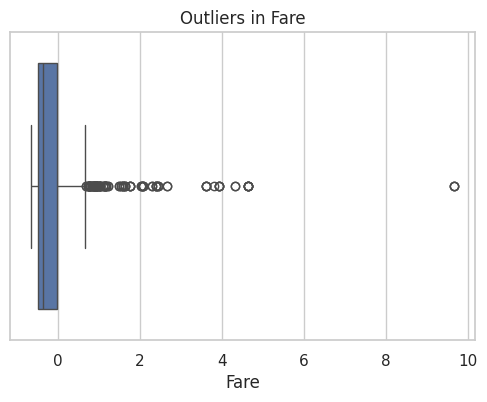

In [50]:
# Visualize outliers in 'Fare'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Fare'])
plt.title("Outliers in Fare")
plt.show()

In [51]:
# Remove outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

In [52]:
print("\nData Shape After Outlier Removal:", df.shape)


Data Shape After Outlier Removal: (775, 12)


-------------------------------

## Step 8: Saving the Cleaned Dataset

-------------------------------

In [53]:
df.to_csv("Titanic-Dataset_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Titanic-Dataset_cleaned.csv'")


Cleaned dataset saved as 'Titanic-Dataset_cleaned.csv'


-------------------------------

## Step 9: Final Verification

-------------------------------

In [54]:
print("\nFinal Dataset Preview:")
df.head()


Final Dataset Preview:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,1,0,1
5,6,0,3,"Moran, Mr. James",-0.104637,0,0,330877,-0.478116,1,1,0
